In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
def to_categorical(label_array, count_number=10):
    """Пердставить лейбал в виде массива со значением"""
    label_array = np.array(label_array) 
    n = label_array.shape[0]
    categorical = np.zeros((n, count_number))
    categorical[np.arange(n), label_array] = 1
    return categorical


In [19]:
def load_data():
    """Загрузка датасета"""
    (train_X, train_Y), (test_X, test_Y) = mnist.load_data()

    print(train_X.shape)
    # преобразование в 1 канал 
    train_X = train_X.reshape((train_X.shape[0], 28, 28))/255.
    test_X = test_X.reshape((test_X.shape[0], 28, 28))/255.
    
    # перевод в one hot encoder 
    train_Y = to_categorical(train_Y)
    test_Y = to_categorical(test_Y)

    return (train_X.round(), train_Y), (test_X.round(), test_Y)

In [20]:
(train_X, train_Y), (test_X, test_Y) = load_data()

(60000, 28, 28)


In [21]:
train_X[1].max()

1.0

In [22]:
train_Y[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

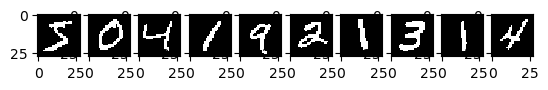

In [23]:
f  = plt.figure()
for i, image  in enumerate(train_X[:10]):
    f.add_subplot(1,10, i+1)
    plt.imshow(image, cmap="gray")
plt.show()

In [24]:
class Perceptron:
    """Класс для перцептрона"""
    def __init__ (self, input_shape, output_shape):
        # Xavier initialization
        stdv = 1/np.sqrt(input_shape)
        self.W = np.random.uniform(-stdv, stdv, size=(input_shape, output_shape))
        self.b = np.random.uniform(-stdv, stdv, size=output_shape)
    
    #функция активации 

    def __ReLU(self, x):
        return np.maximum(0,x)

    def __dReLU(self,x):
        return 1 * (x > 0) 

    def __softmax(self, z):
        z = z - np.max(z, axis = 1).reshape(z.shape[0],1)
        return np.exp(z) / np.sum(np.exp(z), axis = 1).reshape(z.shape[0],1)

    def forward(self, input):
        self.output = np.dot(input, self.W)
        self.output += self.b 
        return self.output   
        
    def train():
        